In [1]:
import pytz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from binance import Client

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', None)

In [2]:
client = Client()
symbols = client.get_exchange_info()
all_symbols = []
for i in symbols['symbols']:
    s = i['symbol']
    if s[-4:] == 'USDT':
        all_symbols.append(i['symbol'])       

In [3]:
import csv
import os

klines_columns = ["date","o","h","l","c","v","ct","qv","t","tbv","tbq","i"]
ex = ["v","ct","qv","t","tbv","tbq","i"]
symbols_ath = {}
df = pd.DataFrame()

if os.path.exists("ath.csv"):
    file = open("ath.csv", "r")
    read = csv.reader(file)
    symbols_ath = {rows[0]:rows[1] for rows in read }
else:

    for i in all_symbols:
        k = client.get_historical_klines(i, Client.KLINE_INTERVAL_1DAY, "1 Jan, 2017")
        klines = pd.DataFrame.from_records(k, columns=klines_columns, exclude=ex)
        klines[["o","h","l","c"]] = klines[["o","h","l","c"]].astype('float')
        symbols_ath[i] = klines['h'].max()
        
    file = open("ath.csv", "w")
    writer = csv.writer(file)

    for key, value in symbols_ath.items():
        writer.writerow([key, value])

    file.close()

In [4]:
df = pd.DataFrame.from_dict(symbols_ath, columns = ['ath'], orient='index' )
df.head()

,ath
BTCUSDT,69000.0
ETHUSDT,4868.0
BNBUSDT,691.77
BCCUSDT,5389.35
NEOUSDT,198.6


In [5]:
df['price'] = np.nan
df['percent'] = np.nan

df_list = ["BTCUSDT", "FLMUSDT", "ETCUSDT", "TRBUSDT", "CTSIUSDT", "FILUSDT", "BELUSDT", "OPUSDT", "BONDUSDT", "ENJUSDT", \
           "KDAUSDT", "ETHUSDT", "LDOUSDT", "LINKUSDT", "APEUSDT", "MKRUSDT", "GMTUSDT", "ATOMUSDT", \
           "XMRUSDT", "SUSHIUSDT", "ENSUSDT", "BURGERUSDT", "FTMUSDT", "AAVEUSDT", "UNIUSDT", "XTZUSDT", \
           "AVAXUSDT", "XLMUSDT", "SOLUSDT", "ADAUSDT", "XRPUSDT", "CRVUSDT"]

#for i in all_symbols:
for i in df_list:
    k3 = client.get_ticker(symbol = i)
    current_price = float(k3['lastPrice'])
    df.loc[i, 'price'] = current_price
    percent = round(current_price*100/float(symbols_ath[i]) , 2)
    df.loc[i, 'percent'] = percent
df_filtered = df[~df['percent'].isna()].sort_values(by='percent', ascending =False)
df_filtered

,ath,price,percent
OPUSDT,2.2,1.50,68.32
LDOUSDT,3.89,2.17,55.89
BTCUSDT,69000.0,"22,868.76",33.14
ETHUSDT,4868.0,"1,590.82",32.68
XMRUSDT,519.13,156.70,30.19
APEUSDT,28.0,6.68,23.85
ATOMUSDT,44.8,10.02,22.37
GMTUSDT,4.17851,0.92,21.95
ETCUSDT,179.83,35.95,19.99
KDAUSDT,9.675,1.85,19.17


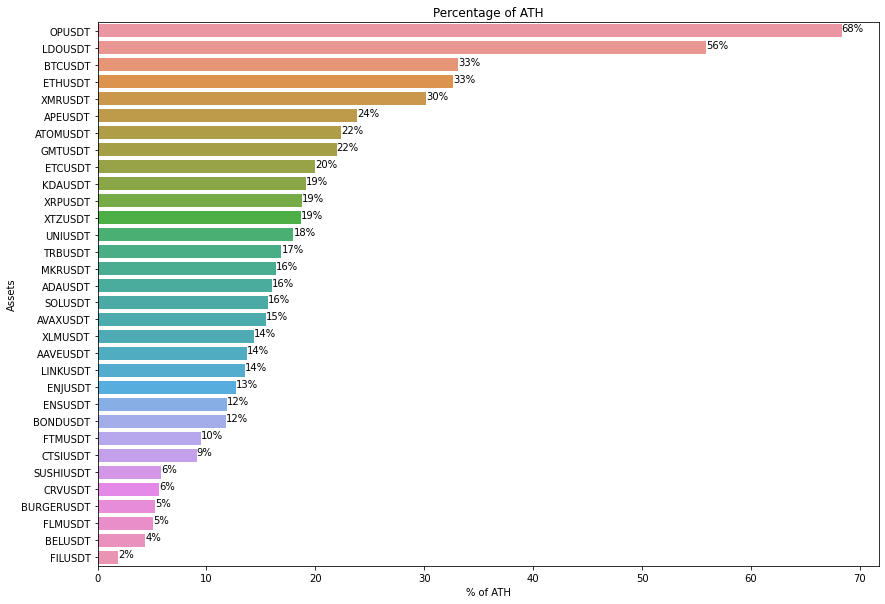

In [6]:
f, ax = plt.subplots(figsize=(14, 10))
ax = sns.barplot(y=df_filtered.index, 
                 x='percent', 
                 data=df_filtered, 
                 orient="h") 
plt.xlabel('% of ATH')
plt.ylabel('Assets')
plt.gca().set_title('Percentage of ATH')

for x, y in enumerate (df_filtered['percent']):
    plt.text(y, x, str(round(y)) + "%")

plt.show()